In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from common import *
import sys
sys.path.append("..")
from plot_notebooks.plotfunctions import plot_range

# Synthetic, original

In [2]:
cent_orig = np.genfromtxt("results/cent_synth_orig.csv", delimiter = ",")
om_orig = np.genfromtxt("results/om_synth_orig.csv", delimiter = ",")
ds_orig = np.genfromtxt("results/ds_synth_orig.csv", delimiter = ",")
ds_untuned_orig = np.genfromtxt("results/ds_synth_orig_untuned.csv", delimiter = ",")
V2_beta01_50ppc = np.load("results/abl_beta0.1_ppc_50.npy")
V2_beta1_50ppc = np.load("results/abl_beta1_ppc_50.npy")
V2_beta10_50ppc = np.load("results/abl_beta10_ppc_50.npy")
V2_beta01_100ppc = np.load("results/abl_beta0.1_ppc_100.npy")

In [4]:
V2_beta01_50ppc.shape

(200, 100, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x7facffc29610>,
 'caps': [<matplotlib.lines.Line2D at 0x7facffc29cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7facffc29410>],
 'medians': [<matplotlib.lines.Line2D at 0x7facffc553d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7facffc55710>],
 'means': []}

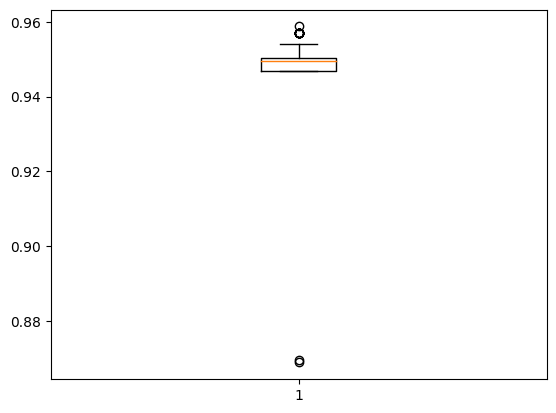

In [24]:
plt.boxplot(V2_beta01_50ppc[:,-1,0])

In [10]:
V2_toPlot = np.array([V2_beta01_50ppc[:, -1, 0], V2_beta1_50ppc[:, -1, 0], V2_beta10_50ppc[:, -1, 0]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


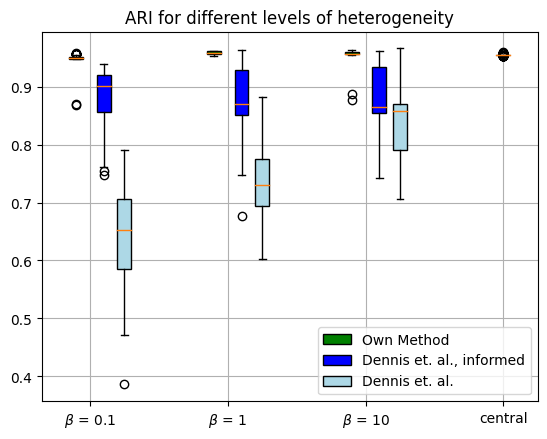

In [11]:
#bp2 = plt.boxplot(om_orig, positions = [-0.5, 1.5, 3.5], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="red"))
bp4 = plt.boxplot(V2_toPlot.T, positions = [-0.2, 1.8, 3.8], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="green"))
bp1 = plt.boxplot(ds_orig, positions = [0.2, 2.2, 4.2], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="blue"))
bp3 = plt.boxplot(cent_orig[:,0], positions = [6], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="purple"))
bp5 = plt.boxplot(ds_untuned_orig, positions = [0.5, 2.5,4.5], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="lightblue"))
#plt.ylim([0.7, 1])
plt.xticks([0, 2, 4, 6], [r"$\beta$ = 0.1",r"$\beta$ = 1",r"$\beta$ = 10", "central"])
plt.grid(True)
plt.legend([bp4['boxes'][0], bp1['boxes'][0], bp5['boxes'][0] ], ["Own Method", "Dennis et. al., informed", "Dennis et. al."])
plt.title("ARI for different levels of heterogeneity")
plt.savefig("synth_orig_V2.eps",format = "eps")

In [4]:
#V2_abl = np.load("results/abl_V2.npy")
central_abl = np.load("results/scores_central_abl.npy")
DS_abl = np.load("results/abl_DS.npy")
V2_n1_b01_20r = np.load("results/b01_n1_20rounds200ppc.npy")
V2_n15_b01_20r = np.load("results/b01_n15_20rounds_200ppc.npy")

In [3]:
V2_abl.shape
#central_abl.shape
DS_abl.shape

(200, 3, 3, 6)

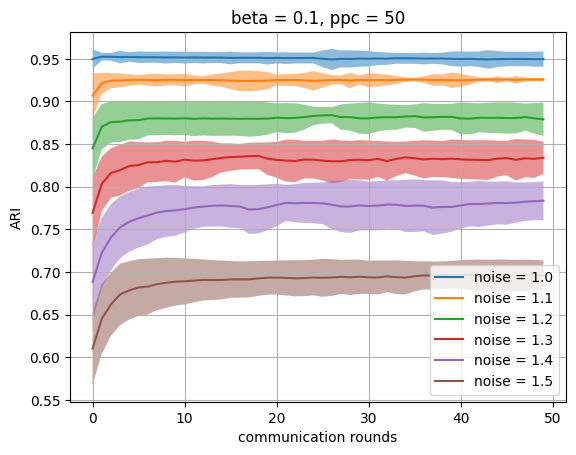

In [5]:
#plot_range(V2_abl[:,:,2,2,0].T, label = "noise = 1")
for i in range(V2_beta01_50ppc.shape[-1]):
    label = "noise = " + str(1 + 0.1*i)
    plot_range(V2_beta01_50ppc[:,0:50,i], label = label)
#plot_range(V2_abl[:,:,2,2,5].T, label = "noise = 1.5")
#plot_range(V2_beta01_50ppc[:,0:50,-1], label = "noise = 1.5")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("ARI")
plt.legend()
plt.title("beta = 0.1, ppc = 50")
plt.savefig("convergence_b01_ppc50.png",format = "png")

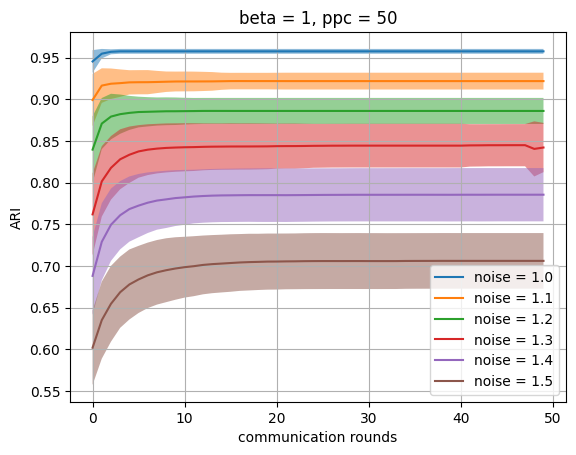

In [6]:
#plot_range(V2_abl[:,:,2,2,0].T, label = "noise = 1")
for i in range(V2_beta1_50ppc.shape[-1]):
    label = "noise = " + str(1 + 0.1*i)
    plot_range(V2_beta1_50ppc[:,0:50,i], label = label)
#plot_range(V2_abl[:,:,2,2,5].T, label = "noise = 1.5")
#plot_range(V2_beta01_50ppc[:,0:50,-1], label = "noise = 1.5")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("ARI")
plt.legend()
plt.title("beta = 1, ppc = 50")
plt.savefig("convergence_b1_ppc50.png",format = "png")

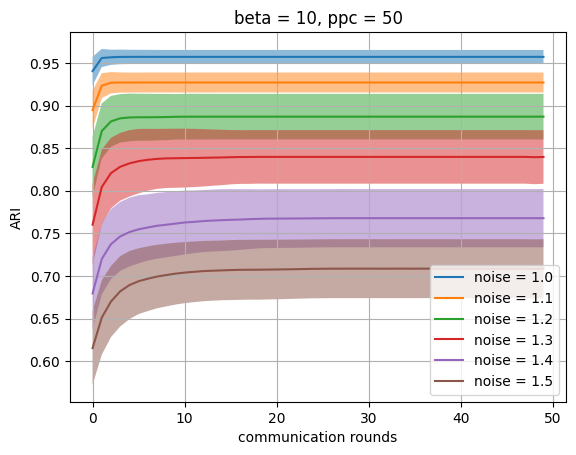

In [7]:
#plot_range(V2_abl[:,:,2,2,0].T, label = "noise = 1")
for i in range(V2_beta10_50ppc.shape[-1]):
    label = "noise = " + str(1 + 0.1*i)
    plot_range(V2_beta10_50ppc[:,0:50,i], label = label)
#plot_range(V2_abl[:,:,2,2,5].T, label = "noise = 1.5")
#plot_range(V2_beta01_50ppc[:,0:50,-1], label = "noise = 1.5")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("ARI")
plt.legend()
plt.title("beta = 10, ppc = 50")
plt.savefig("convergence_beta10_ppc50.png",format = "png")

In [12]:
V2_50ppc = np.stack([V2_beta01_50ppc, V2_beta1_50ppc, V2_beta10_50ppc], axis = 3)

In [25]:
V2_beta01.shape

(200, 100, 6)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


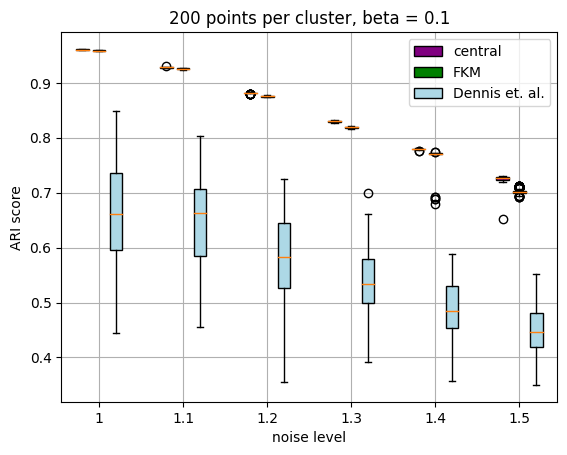

In [31]:
betas = [0.1, 1, 10]
ppcs = [50, 100, 200]
ppc_i = 2
noise_i = 0
beta_i = 0
V2_file = np.load("results/abl_beta" + str(betas[beta_i]) + "_ppc_" + str(ppcs[ppc_i]) + ".npy")

bp1 = plt.boxplot(central_abl[:,ppc_i, :], positions = [-0.4,1.6,3.6,5.6,7.6, 9.6], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="purple"))
bp2 = plt.boxplot(V2_file[:,-1,:], positions = [0, 2, 4, 6, 8, 10],widths = 0.3, patch_artist = True, boxprops=dict(facecolor="green"))
bp3 = plt.boxplot(DS_abl[:,beta_i, ppc_i, :], positions = [0.4, 2.4, 4.4, 6.4, 8.4, 10.4], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="lightblue"))
plt.grid(True)
plt.xticks([0, 2, 4, 6, 8, 10], [1, 1.1, 1.2, 1.3, 1.4, 1.5])
plt.xlabel("noise level")
plt.ylabel("ARI score")
plt.title(str(ppcs[ppc_i]) + " points per cluster, beta = " + str(betas[beta_i]))
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]], ["central", 'FKM', "Dennis et. al."])
plt.savefig(str(ppcs[ppc_i]) + "ppc_b"+str(betas[beta_i]) + "_noises.eps",format = "eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


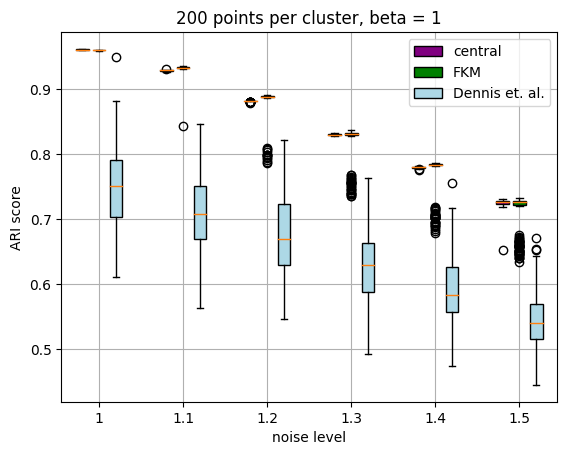

In [28]:
betas = [0.1, 1, 10]
ppcs = [50, 100, 200]
ppc_i = 2
noise_i = 0
beta_i = 1
V2_file = np.load("results/abl_beta" + str(betas[beta_i]) + "_ppc_" + str(ppcs[ppc_i]) + ".npy")

bp1 = plt.boxplot(central_abl[:,ppc_i, :], positions = [-0.4,1.6,3.6,5.6,7.6, 9.6], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="purple"))
bp2 = plt.boxplot(V2_file[:,-1,:], positions = [0, 2, 4, 6, 8, 10],widths = 0.3, patch_artist = True, boxprops=dict(facecolor="green"))
bp3 = plt.boxplot(DS_abl[:,beta_i, ppc_i, :], positions = [0.4, 2.4, 4.4, 6.4, 8.4, 10.4], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="lightblue"))
plt.grid(True)
plt.xticks([0, 2, 4, 6, 8, 10], [1, 1.1, 1.2, 1.3, 1.4, 1.5])
plt.xlabel("noise level")
plt.ylabel("ARI score")
plt.title(str(ppcs[ppc_i]) + " points per cluster, beta = " + str(betas[beta_i]))
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]], ["central", 'FKM', "Dennis et. al."])
plt.savefig(str(ppcs[ppc_i]) + "ppc_b"+str(betas[beta_i]) + "_noises.eps",format = "eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


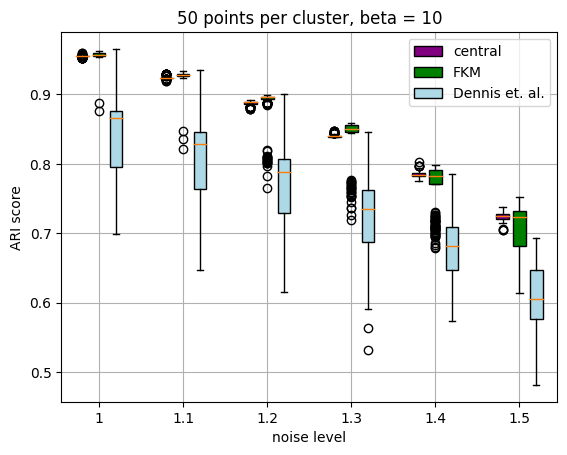

In [25]:
betas = [0.1, 1, 10]
ppcs = [50, 100, 200]
ppc_i = 0
noise_i = 0
beta_i = 2
V2_file = np.load("results/abl_beta" + str(betas[beta_i]) + "_ppc_" + str(ppcs[ppc_i]) + ".npy")


bp1 = plt.boxplot(central_abl[:,ppc_i, :], positions = [-0.4,1.6,3.6,5.6,7.6, 9.6], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="purple"))
bp2 = plt.boxplot(V2_file[:,-1,:], positions = [0, 2, 4, 6, 8, 10],widths = 0.3, patch_artist = True, boxprops=dict(facecolor="green"))
bp3 = plt.boxplot(DS_abl[:,beta_i, ppc_i, :], positions = [0.4, 2.4, 4.4, 6.4, 8.4, 10.4], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="lightblue"))
plt.grid(True)
plt.xticks([0, 2, 4, 6, 8, 10], [1, 1.1, 1.2, 1.3, 1.4, 1.5])
plt.xlabel("noise level")
plt.ylabel("ARI score")
plt.title(str(ppcs[ppc_i]) + " points per cluster, beta = " + str(betas[beta_i]))
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]], ["central",'FKM', "Dennis et. al."])
plt.savefig(str(ppcs[ppc_i]) + "ppc_b"+str(betas[beta_i]) + "_noises.eps",format = "eps")

# Synthetic, different distribution per client

In [13]:
cent_ci = np.genfromtxt("results/cent_synth_ci.csv", delimiter = ",")
om_ci = np.load("results/cluster_wise.npy")
ds_ci = np.genfromtxt("results/ds_synth_ci.csv", delimiter = ",")

In [44]:
om_ci.shape

(200, 100)

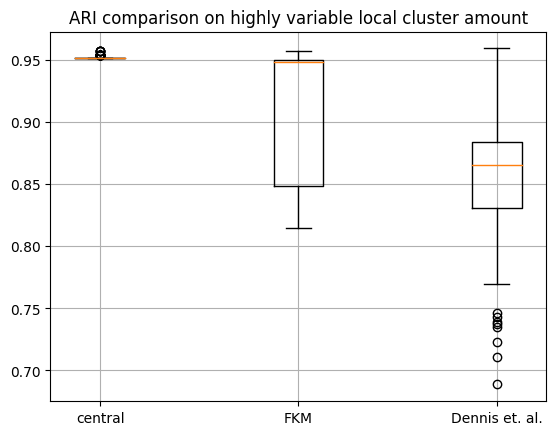

In [22]:
plt.boxplot(cent_ci, widths = 0.5,positions = [0])
plt.boxplot(om_ci[:,-1], widths = 0.5, positions = [2])
#plt.boxplot(V2_ci_w[-1, :], widths = 0.5,positions = [2])
plt.boxplot(ds_ci, widths = 0.5, positions = [4])
plt.xticks([0, 2, 4], ["central", "FKM",  "Dennis et. al.", ])
plt.grid(True)
plt.title("ARI comparison on highly variable local cluster amount")
plt.savefig("ci_results_V2.eps",format = "eps")

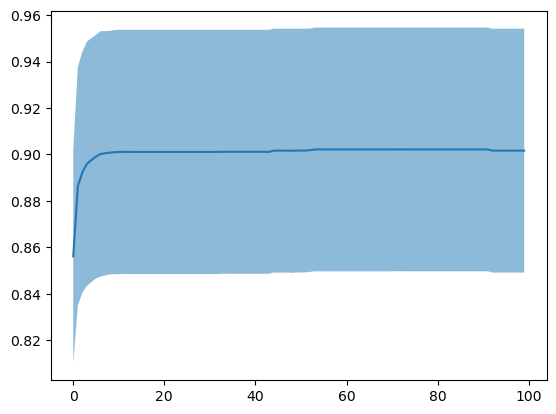

In [52]:
plot_range(om_ci)

# Synthetic, non-uniform

In [16]:
cent_sd = np.genfromtxt("results/cent_synth_sd.csv", delimiter = ",")
om_sd_natT = np.genfromtxt("results/om_synth_sd_natT.csv", delimiter = ",")
om_sd_t1 = np.genfromtxt("results/om_synth_sd_t1.csv", delimiter = ",")
ds_sd = np.genfromtxt("results/ds_synth_sd.csv", delimiter = ",")


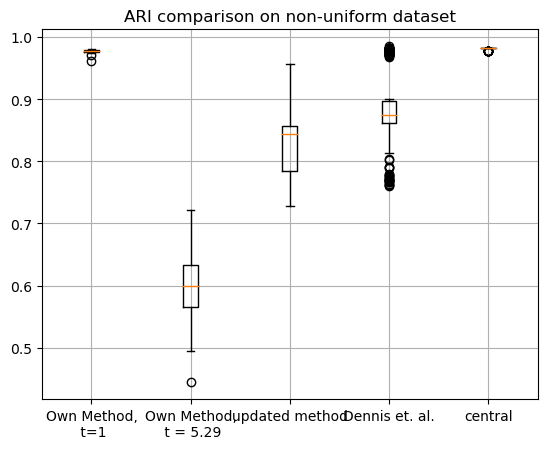

In [17]:
plt.boxplot(om_sd_t1[-1,:], positions = [0])
plt.boxplot(om_sd_natT[-1,:], positions = [1])
plt.boxplot(om_V2_sd[-1, :], positions = [2])
plt.boxplot(ds_sd, positions = [3])
plt.boxplot(cent_sd, positions = [4])
plt.xticks([0, 1, 2, 3, 4], ["Own Method,\n t=1", "Own Method,\n t = 5.29", "updated method",  "Dennis et. al.","central"])
plt.grid(True)
plt.title("ARI comparison on non-uniform dataset")
plt.savefig("non_uniform_results.eps",format = "eps")

# FEMNIST

In [50]:
cent_fn = np.genfromtxt("results/femnist_cent_silh.csv", delimiter = ",")
cent_ssilh = np.genfromtxt("results/femnist_cent_ssilh.csv", delimiter = ",")
om_fn_natT = np.genfromtxt("results/femnist_om_natt.csv", delimiter = ",")
om_fn_tuned = np.genfromtxt("results/femnist_om.csv", delimiter = ",")
ds_fn_silh = np.genfromtxt("results/femnist_ds_silh.csv", delimiter = ",")
ds_fn_ssilh = np.genfromtxt("results/femnist_ds_ssilh.csv", delimiter = ",")

fn_V2 = np.load("results/FEMNIST.npy")
ds_fn_untuned = np.genfromtxt("results/femnist_ds_untuned.csv", delimiter = ",")

ds_fn_untuned_silh = np.genfromtxt("results/femnist_ds_untuned_silh.csv", delimiter = ",")
ds_fn_untuned_ssilh = np.genfromtxt("results/femnist_ds_untuned_ssilh.csv", delimiter = ",")

fm_ssilh = np.genfromtxt("results/FEMNIST_ssilh.csv", delimiter = ",")
fm_ssilh = fm_ssilh[1:, :2]

In [56]:
fn_V2.shape

(200, 100)

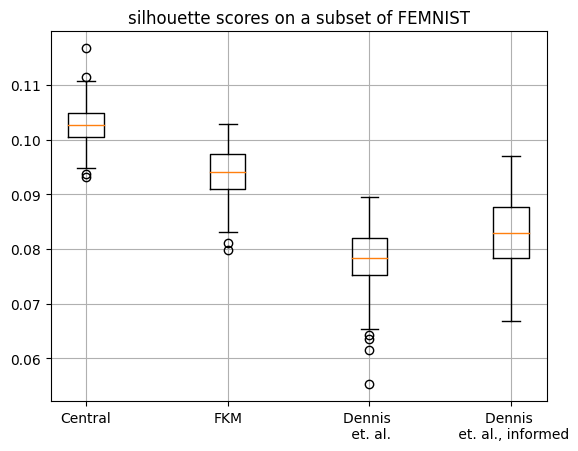

In [55]:
plt.boxplot([cent_fn, fm_ssilh[:,0],ds_fn_untuned_silh,  ds_fn_silh], positions = [0,2,4, 6])
plt.xticks([0,2,4, 6],["Central", "FKM", "Dennis \n et. al.", "Dennis \n et. al., informed"])
plt.title("silhouette scores on a subset of FEMNIST")
plt.grid(True)
plt.savefig("FEMNIST_silh_V2.eps",format = "eps")

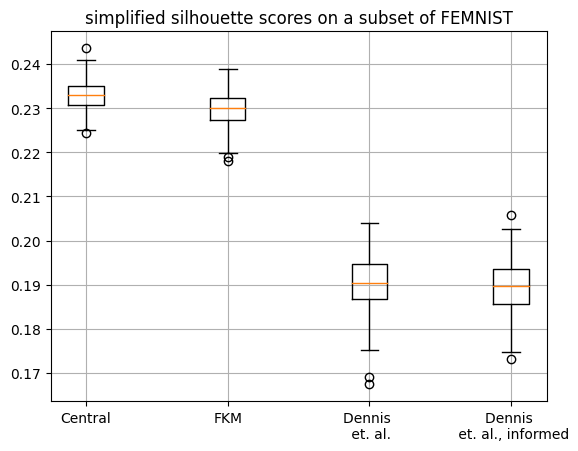

In [54]:
plt.boxplot([cent_ssilh, fm_ssilh[:,1],ds_fn_untuned_ssilh,  ds_fn_ssilh], positions = [0,2,4, 6])
plt.xticks([0,2,4, 6],["Central", "FKM", "Dennis \n et. al.", "Dennis \n et. al., informed"])
plt.title("simplified silhouette scores on a subset of FEMNIST")
plt.grid(True)
plt.savefig("FEMNIST_ssilh_V2.eps",format = "eps")

# Dset visualizations

Text(0.5, 1.0, 'distribution of the non-uniform dataset')

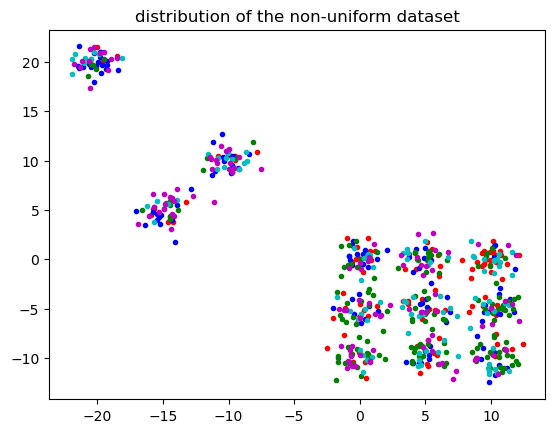

In [3]:
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(5):
    data, labels = load_data(i, "super_diag")
    plt.plot(data[:,0], data[:,1],".", color = colors[i])
plt.title("distribution of the non-uniform dataset")
#plt.grid(True)
#plt.savefig("non_uniform_dist.eps",format = "eps")

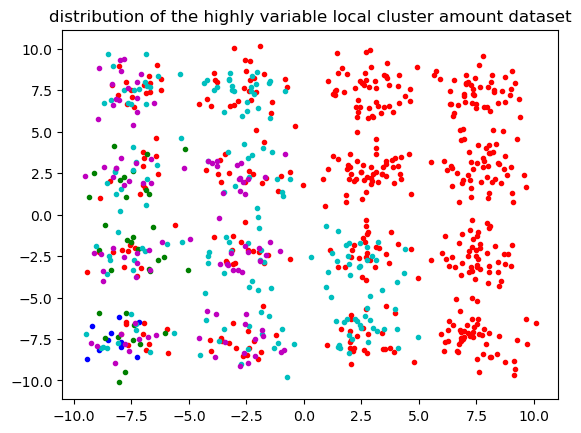

In [56]:
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(5):
    data, labels = load_data(i, "cluster_wise")
    plt.plot(data[:,0], data[:,1],".", color = colors[i])
plt.title("distribution of the highly variable local cluster amount dataset")
plt.savefig("ci_dist.eps",format = "eps")

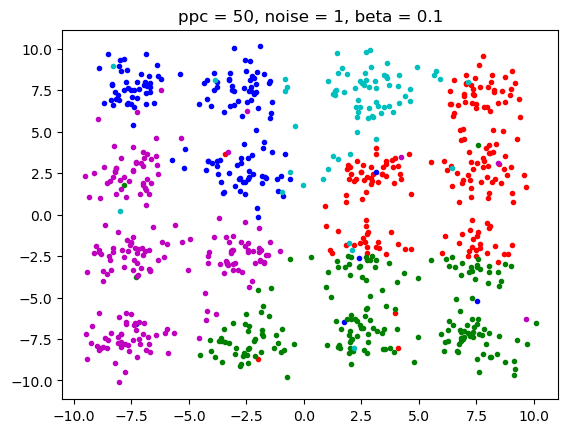

In [48]:
colors =  ['r', 'b', 'g', 'c', 'm']
noise = 1
ppc = 50
beta = 0.1
for i in range(5):
    data, labels = load_data(i, "abl", beta=beta, ppc=ppc, noise=noise)
    plt.plot(data[:,0], data[:,1],".", color = colors[i])
plt.title("ppc = " +  str(ppc) + ", noise = "+ str(noise) + ", beta = "+ str(beta))
plt.savefig("50ppc_b01_n1_dist.eps",format = "eps")

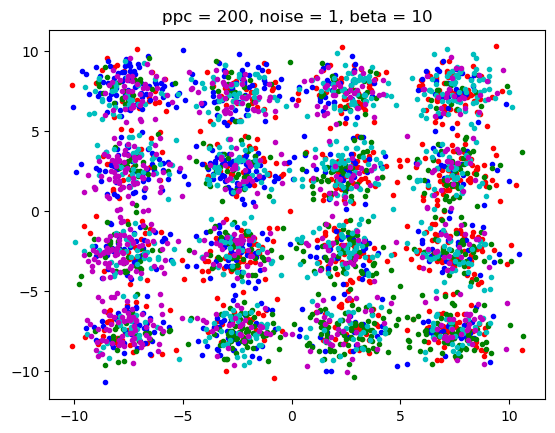

In [49]:
colors =  ['r', 'b', 'g', 'c', 'm']
noise = 1
ppc = 200
beta = 10
for i in range(5):
    data, labels = load_data(i, "abl", beta=beta, ppc=ppc, noise=noise)
    plt.plot(data[:,0], data[:,1],".", color = colors[i])
plt.title("ppc = " +  str(ppc) + ", noise = "+ str(noise) + ", beta = "+ str(beta))
plt.savefig("abl_ppc" + str(ppc) + "_noise" + str(noise) + "beta" + str(beta) + "_dist.eps",format = "eps")